In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv(r"C:\Users\Bacardi\Downloads\Employee.csv")

In [3]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [4]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Employee ID                   int64
Age                           int64
Gender                       object
Years at Company              int64
Job Role                     object
Monthly Income                int64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home            int64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure                int64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [8]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [9]:
df.info

<bound method DataFrame.info of        Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0             8410   31    Male                19   Education            5390   
1            64756   59  Female                 4       Media            5534   
2            30257   24  Female                10  Healthcare            8159   
3            65791   36  Female                 7   Education            3989   
4            65026   56    Male                41   Education            4821   
...            ...  ...     ...               ...         ...             ...   
74493        16243   56  Female                42  Healthcare            7830   
74494        47175   30  Female                15   Education            3856   
74495        12409   52    Male                 5   Education            5654   
74496         9554   18    Male                 4   Education            5276   
74497        73042   59  Female                48   Education            3774

In [10]:
num_df = df.select_dtypes(include="number")

In [11]:
num_df

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,8410,31,19,5390,2.0,22,0.0,89
1,64756,59,4,5534,3.0,21,3.0,21
2,30257,24,10,8159,0.0,11,3.0,74
3,65791,36,7,3989,1.0,27,2.0,50
4,65026,56,41,4821,0.0,71,0.0,68
...,...,...,...,...,...,...,...,...
74493,16243,56,42,7830,0.0,40,0.0,60
74494,47175,30,15,3856,2.0,45,0.0,20
74495,12409,52,5,5654,0.0,4,4.0,7
74496,9554,18,4,5276,0.0,13,3.0,5


In [12]:
for col in num_df :
    num_df[col]=num_df[col].fillna(num_df[col].median())


Plotting Histograms for Numerical Columns:


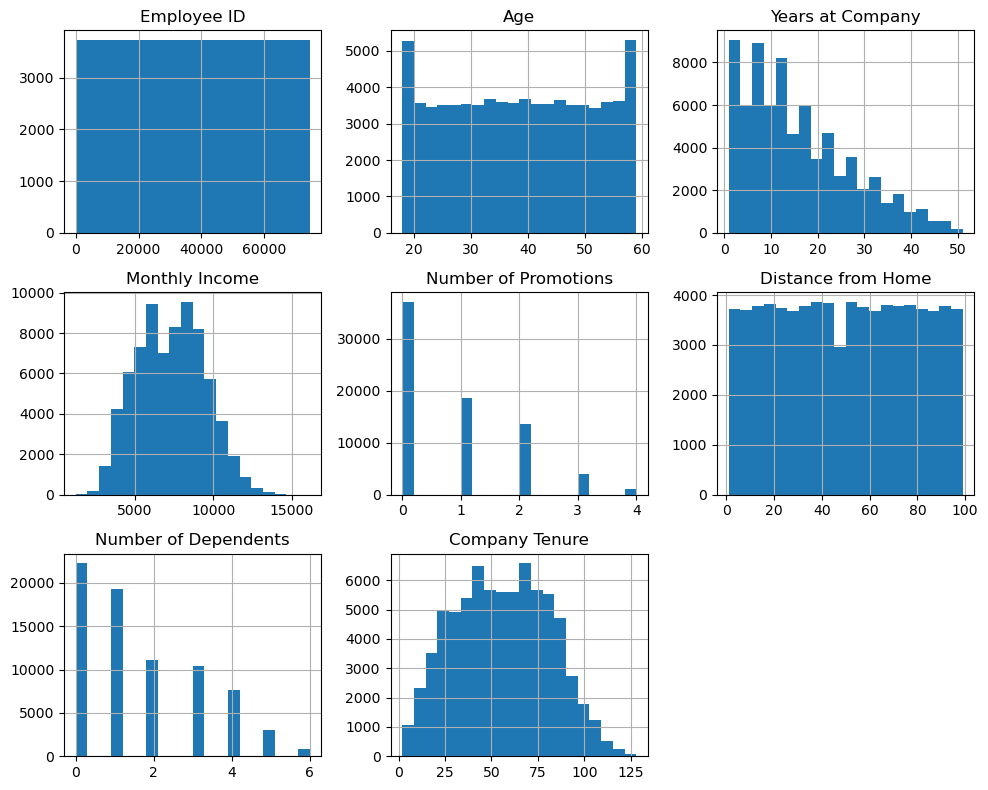

In [13]:
print("\nPlotting Histograms for Numerical Columns:")
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()



Pairplot of Selected Numerical Columns:


KeyError: 'target column'

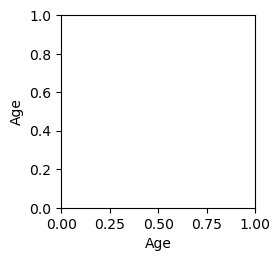

In [14]:
print("\nPairplot of Selected Numerical Columns:")
sns.pairplot(num_df[["Age"]], hue='target column')
plt.show()


Boxplot for Outlier Detection:


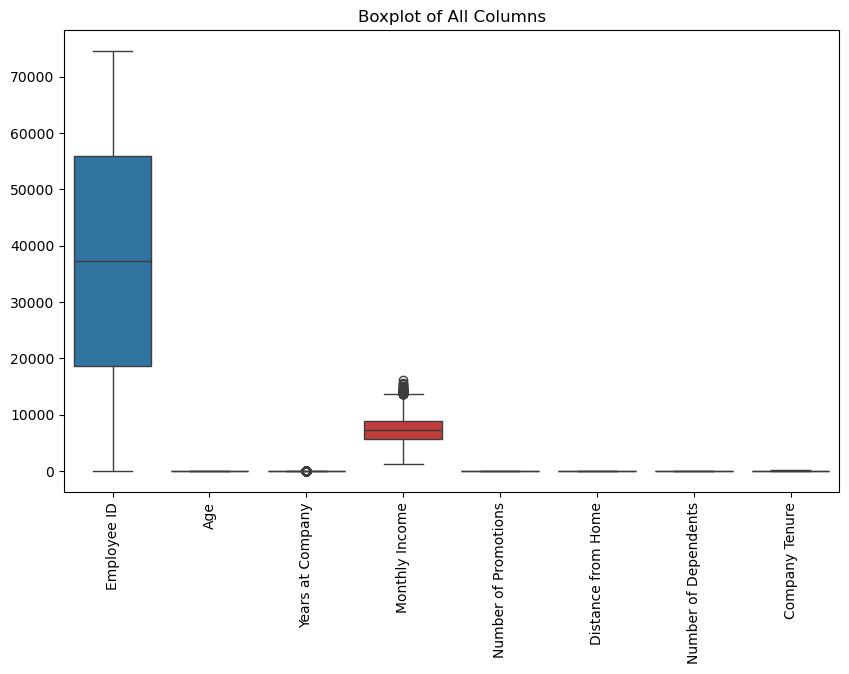

In [15]:
print("\nBoxplot for Outlier Detection:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of All Columns')
plt.show()

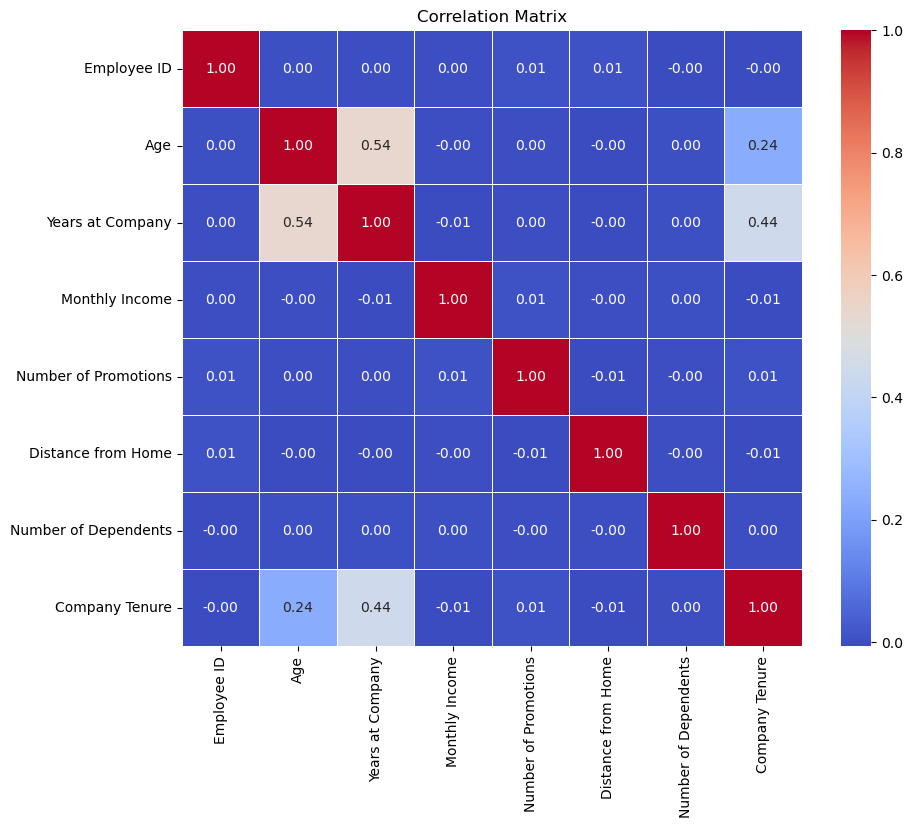

In [17]:
# Correlation 
correlation = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [20]:
X = num_df[["Monthly Income"]]
y = num_df[["Number of Dependents"]]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [28]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 2.390583951540971
R-squared: -0.0002956086869456698


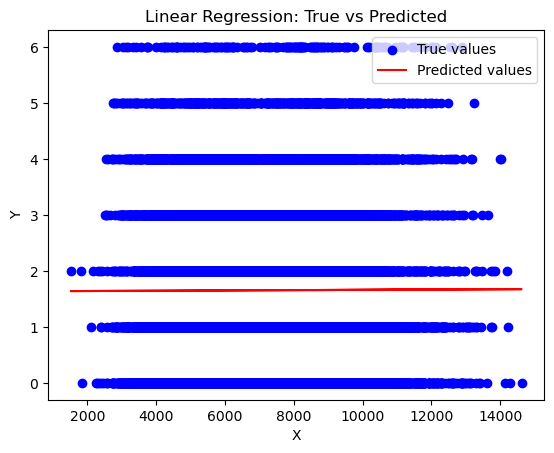

In [30]:
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [39]:
random= RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)


C:\Users\Bacardi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [41]:
random_accuracy = accuracy_score(y_test,y_pred)
print(random_accuracy)

0.24422818791946307
